## **Bài 2:**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./BTC-Daily.csv")

df = df.drop_duplicates()

df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [5]:
# Range of date covered
df["date"] = pd.to_datetime(df["date"])
date_range = str(df["date"].dt.date.min()) + " to " + str(df["date"].dt.date.max())

print(date_range)

2014-11-28 to 2022-03-01


9


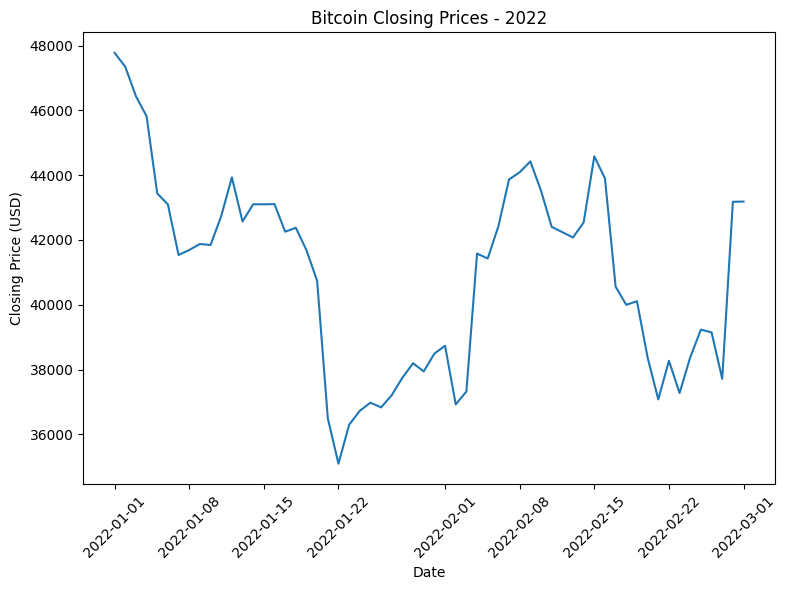

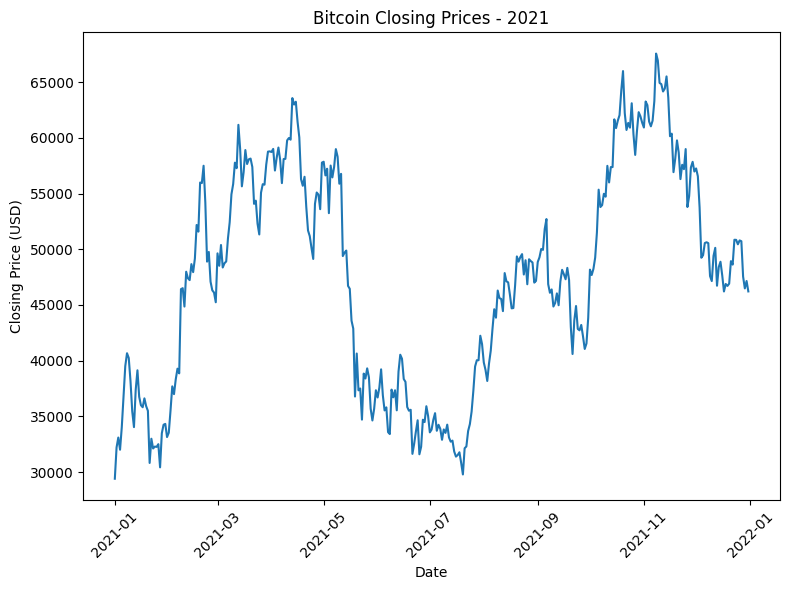

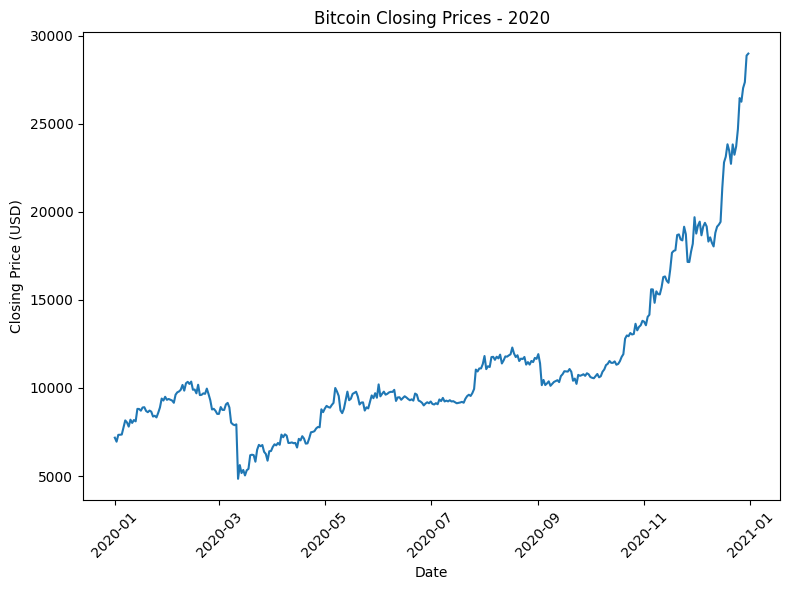

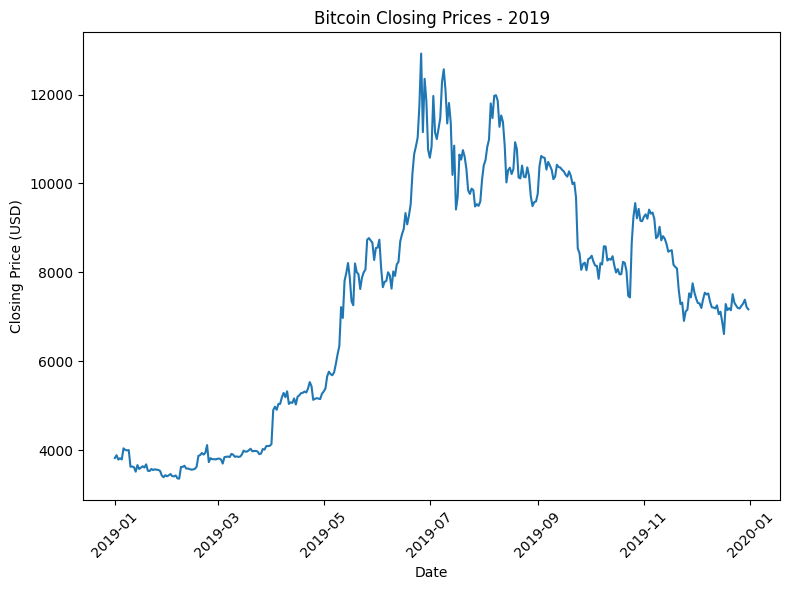

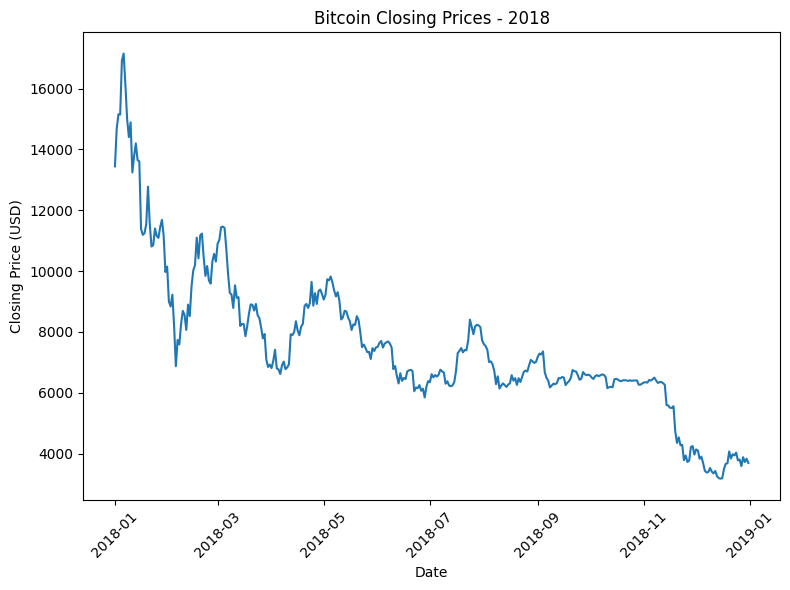

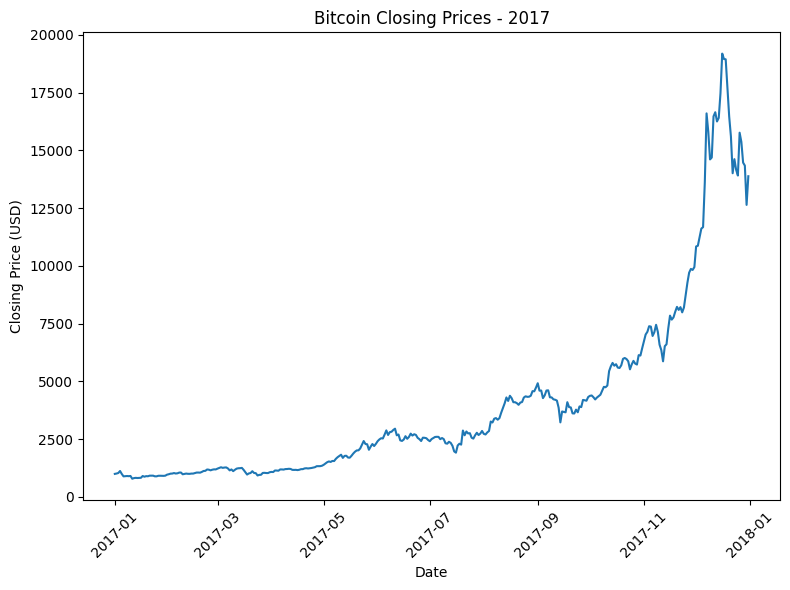

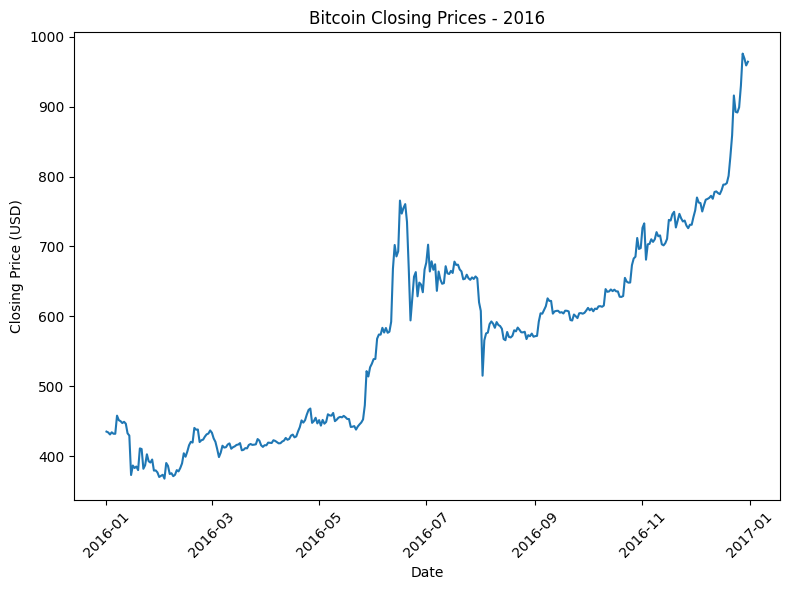

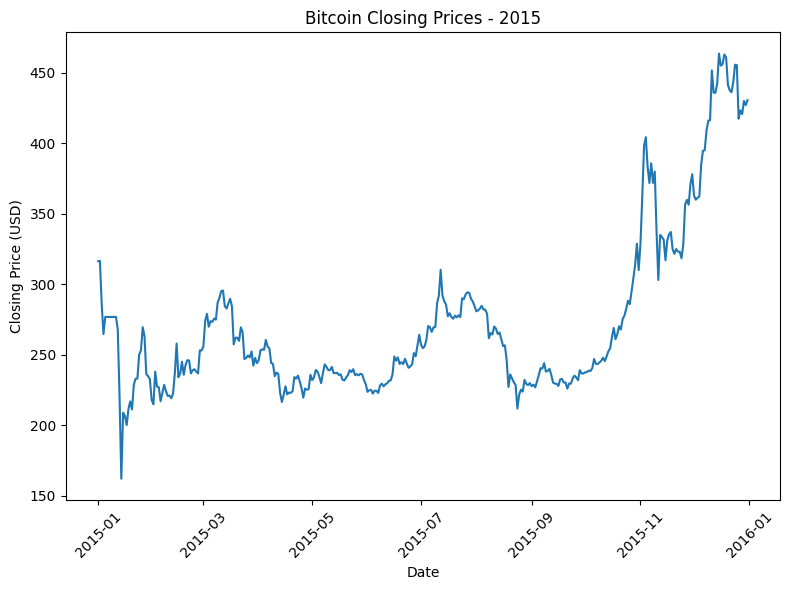

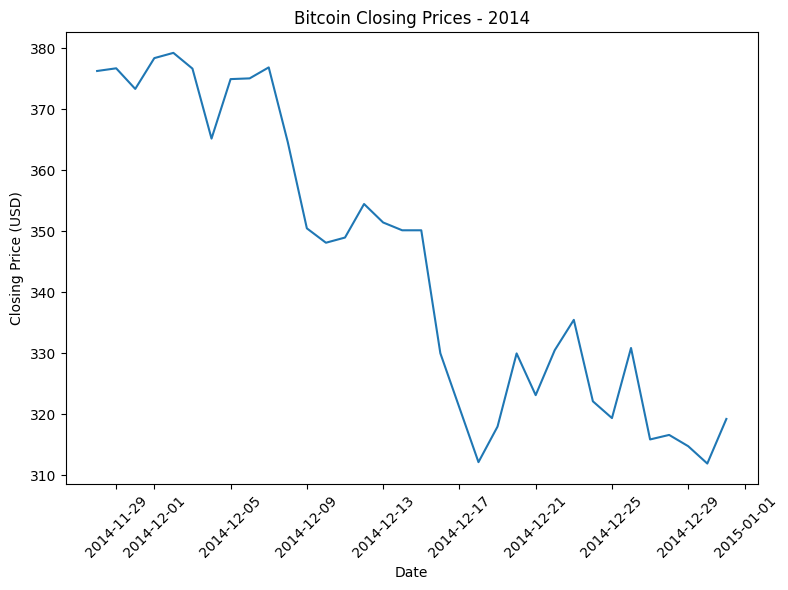

In [24]:
# Cau 4: D
unique_years = df["date"].dt.year.unique().tolist()

for year in unique_years:

    # Your code here
    year_data = df[df["date"].dt.year == year].copy()

    # merged_data = pd.merge(year_month_day, df, on=["year", "month", "day"], how="left")

    # Plot
    plt.figure(figsize=(8, 6))
    # plt.plot(merged_data["date_x"], merged_data["close"])
    plt.plot(year_data["date"], year_data["close"])
    plt.title(f"Bitcoin Closing Prices - {year}")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

</br>

**Biểu đồ nến giá giao dịch từ năm 2019-2022**

In [ ]:
!pip install mplfinance

In [27]:
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime

<ipython-input-31-9d06c39024b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["date"] = df_filtered["date"].map(mdates.date2num)


<class 'pandas.core.series.Series'>


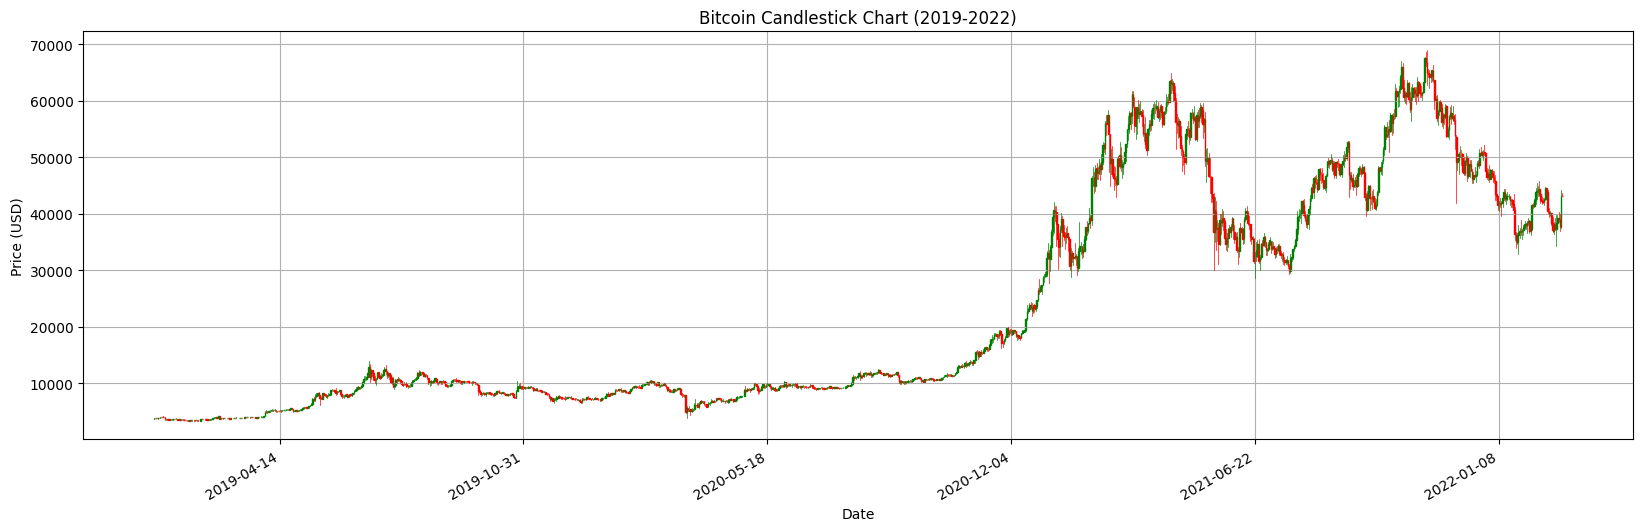

In [31]:
# Filter data for 2019 - 2022
df_filtered = df[(df["date"] >= "2019-01-01") & (df["date"] <= "2022-12-31")]

# Convert date to matplotlib format
df_filtered["date"] = df_filtered["date"].map(mdates.date2num)

# Create candlestick chart
fig, ax = plt.subplots(figsize=(20, 6))

candlestick_ohlc(ax, df_filtered[["date", "open", "high", "low", "close"]].values,
                 width=0.6, colorup="g", colordown="r")

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
fig.autofmt_xdate()

plt.title("Bitcoin Candlestick Chart (2019-2022)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

</br>

**Tạo mô hình Linear Regression**

In [55]:
# Cau 5: D
def predict(X, w, b):
    return X.dot(w) + b


# Cau 6: A
def gradient(y_hat, y, x):
    loss = y_hat - y
    dw = x.T.dot(loss) / len(y)
    db = np.sum(loss) / len(y)
    cost = np.sum(loss ** 2) / (2 * len(y))

    return (dw, db, cost)


# Cau 7: D
def update_weight(w, b, lr, dw, db):
    w_new = w - lr * dw
    b_new = b - lr * db

    return (w_new, b_new)

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


scaler = StandardScaler()

X = df_filtered[["open", "high", "low"]]
y = df_filtered["close"]

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, shuffle=True
)

In [56]:
# Cau 8: C
def linear_regression_vectorization(X, y, n_epochs=200, lr=0.01):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    losses = []

    for _ in range(n_epochs):
        y_hat = predict(X, w, b)
        dw, db, cost = gradient(y_hat, y, X)
        w, b = update_weight(w, b, lr, dw, db)
        losses.append(cost)

    return w, b, losses

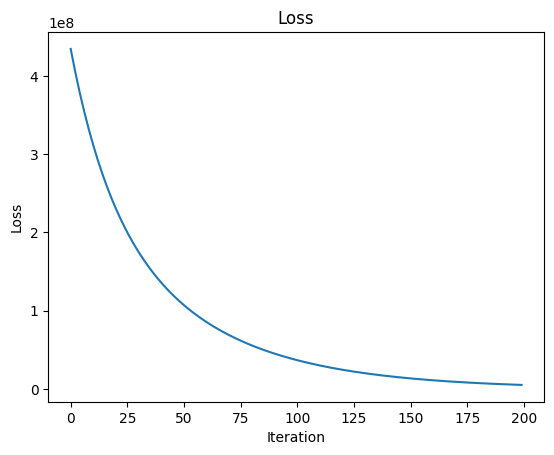

In [57]:
w, b, losses = linear_regression_vectorization(
    X_train, y_train, n_epochs=200, lr=0.01
)

plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss")
plt.show()

In [59]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = predict(X_test, w, b)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate R-squared on training data
y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

# Calculate R-squared on testing data
test_accuracy = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Root Mean Square Error (RMSE):", round(rmse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Training Accuracy (R-squared):", round(train_accuracy, 4))
print("Testing Accuracy (R-squared):", round(test_accuracy, 4))


Root Mean Square Error (RMSE): 3112.1732
Mean Absolute Error (MAE): 3026.9859
Training Accuracy (R-squared): 0.9715
Testing Accuracy (R-squared): 0.9741
